### Useful Resources
- https://spotipy.readthedocs.io/en/2.19.0/

## Data Collection

#### API call setup

In [123]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%autosave 30

Autosaving every 30 seconds


In [69]:
client_id = #ENTER CLIENT_ID
client_secret = #ENTER CLIENT_SECRET_KEY

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

#### Extract specific playlist

In [3]:
#get all tracks for a playlist
def get_playlist_tracks(username,playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [32]:
playlists = [['''Today's Top Hits''','spotify','37i9dQZF1DXcBWIGoYBM5M'],
 ['Your Favorite CoffeeHouse','spotify','37i9dQZF1DX6ziVCJnEm59'],
 ['RapCaviar','spotify','37i9dQZF1DX0XUsuxWHRQd'],
 ['Viva Latino','spotify','37i9dQZF1DX10zKzsJ2jva'],
 ['Hot Country','spotify','37i9dQZF1DX1lVhptIYRda'],
 ['New Music Friday','spotify','37i9dQZF1DX4JAvHpjipBk'],
 ['Peaceful Piano','spotify','37i9dQZF1DXcBWIGoYBM5M'],
 ['Are & Be','spotify','37i9dQZF1DX4SBhb3fqCJd'],
 ['Mint','spotify','37i9dQZF1DX4dyzvuaRJ0n'],
 ['Just Hits','spotify','37i9dQZF1DXcRXFNfZr7Tp'],
 ['Soft Pop Hits','spotify','37i9dQZF1DWTwnEm1IYyoj'],
 ['All Out 2000s','spotify','37i9dQZF1DX4o1oenSJRJd'],
 ['Reverberation','h0572wwbcwym536rga31czi84','4puKKbk5xNIpmtYUI2OYzt']]

In [33]:
pl_info = []
for pl in playlists:
    pl_name=pl[0]
    pl_track_list = get_playlist_tracks(pl[1],pl[2])
    pl_info.append([pl_name,pl_track_list])
    time.sleep(5)

In [45]:
#Inspect first element
#pl_info[0][1][0]

#### Extract each track_id

In [36]:
#extract track id
def getTrackID(ids):
    id = []
    playlist = ids
    for item in playlist:
        id.append(item['track']['id'])
    return id

In [37]:
pl_ids = []
tot_pl = 0
tot_ids = 0
positive_class = 0
for pl in pl_info:
    ids = getTrackID(pl[1])
    pl_ids.append([pl[0],ids])
    tot_pl += 1
    tot_ids += len(ids)
    if pl[0]=='Reverberation':
        positive_class = len(ids)
    print('{} - # of collected ids: {}\n'.format(pl[0],len(ids)))
    time.sleep(5)
print('Total playlists collected: {}'.format(tot_pl))
print('Total ids collected: {}'.format(tot_ids))
print('Total positive class (Reverberation): {}, or {:.2%}'.format(positive_class,positive_class/tot_ids))
print('Total negative class (Other Playlist): {}'.format(tot_ids-positive_class))

Today's Top Hits - # of collected ids: 50

Your Favorite CoffeeHouse - # of collected ids: 127

RapCaviar - # of collected ids: 50

Viva Latino - # of collected ids: 50

Hot Country - # of collected ids: 52

New Music Friday - # of collected ids: 100

Peaceful Piano - # of collected ids: 50

Are & Be - # of collected ids: 50

Mint - # of collected ids: 100

Just Hits - # of collected ids: 90

Soft Pop Hits - # of collected ids: 100

All Out 2000s - # of collected ids: 150

Reverberation - # of collected ids: 1603

Total playlists collected: 13
Total ids collected: 2572
Total positive class (Reverberation): 1603, or 62.33%
Total negative class (Other Playlist): 969


#### Extract features for each track

In [70]:
#Extract feature for each track id
def getTrackFeatures(id,playlist):
    meta = sp.track(id)
    features = sp.audio_features(id)
    
    #metadata
    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']
    
    #feature from the data
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    valence = features[0]['valence']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']
    duration_ms = features[0]['duration_ms']
    mode = features[0]['mode']
    type = features[0]['type']
    
    track = [playlist,id,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,valence,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,duration_ms,mode,type]
    return track

In [71]:
#get info for all tracks in playlist
tracks = []
for pl_i,pl in enumerate(pl_ids):
    playlist = pl[0]
    ids = pl[1]
    for i in range(len(ids)):
        track = getTrackFeatures(ids[i],playlist)
        tracks.append(track)
        time.sleep(.5)
    print('Playlist {} - {}: Features extraction completed'.format(pl_i,playlist))

Playlist 0 - Today's Top Hits: Features extraction completed
Playlist 1 - Your Favorite CoffeeHouse: Features extraction completed
Playlist 2 - RapCaviar: Features extraction completed
Playlist 3 - Viva Latino: Features extraction completed
Playlist 4 - Hot Country: Features extraction completed
Playlist 5 - New Music Friday: Features extraction completed
Playlist 6 - Peaceful Piano: Features extraction completed
Playlist 7 - Are & Be: Features extraction completed
Playlist 8 - Mint: Features extraction completed
Playlist 9 - Just Hits: Features extraction completed
Playlist 10 - Soft Pop Hits: Features extraction completed
Playlist 11 - All Out 2000s: Features extraction completed
Playlist 12 - Reverberation: Features extraction completed


In [72]:
track_columns=['playlist','id','name','album','artist','release_date','length','popularity','acousticness','danceability','energy','valence','instrumentalness','liveness','loudness','speechiness','tempo','time_signature','duration_ms','mode','type']
#create a df
df = pd.DataFrame(tracks, columns=track_columns)
df.to_csv('./data/rvb_data.csv', sep=',')

In [73]:
df.duration_ms.sum()/(1000*60*60)

158.1845847222222

In [74]:
df.playlist.unique()

array(["Today's Top Hits", 'Your Favorite CoffeeHouse', 'RapCaviar',
       'Viva Latino', 'Hot Country', 'New Music Friday', 'Peaceful Piano',
       'Are & Be', 'Mint', 'Just Hits', 'Soft Pop Hits', 'All Out 2000s',
       'Reverberation'], dtype=object)

In [75]:
df.head()

,playlist,id,name,album,artist,release_date,length,popularity,acousticness,danceability,...,valence,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,duration_ms,mode,type
0,Today's Top Hits,4fouWK6XVHhzl78KzQ1UjL,abcdefu,abcdefu,GAYLE,2021-08-13,168601,92,0.2990,0.695,...,0.415,0.000000,0.3670,-5.692,0.0493,121.932,4,168602,1,audio_features
1,Today's Top Hits,5HCyWlXZPP0y6Gqq8TgA20,STAY (with Justin Bieber),STAY (with Justin Bieber),The Kid LAROI,2021-07-09,141805,98,0.0383,0.591,...,0.478,0.000000,0.1030,-5.484,0.0483,169.928,4,141806,1,audio_features
2,Today's Top Hits,6bQfNiqyCX7UaQSvVVGo4I,Shivers,Shivers,Ed Sheeran,2021-09-10,207853,60,0.2810,0.788,...,0.822,0.000000,0.0424,-2.724,0.0856,141.020,4,207853,1,audio_features
3,Today's Top Hits,27NovPIUIRrOZoCHxABJwK,INDUSTRY BABY (feat. Jack Harlow),INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,2021-07-23,212000,97,0.0203,0.736,...,0.894,0.000000,0.0501,-7.409,0.0615,149.995,4,212000,0,audio_features
4,Today's Top Hits,5J6rTmMjF9DVIAF8G3M9n4,Wandered To LA (with Justin Bieber),Wandered To LA (with Justin Bieber),Juice WRLD,2021-12-03,189727,0,0.0509,0.687,...,0.424,0.000003,0.1060,-4.761,0.0400,135.083,4,189728,1,audio_features


## Exploratory Data Analysis

In [78]:
df = pd.read_csv('./data/rvb_data.csv', sep=',')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2572 entries, 0 to 2571
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2572 non-null   int64  
 1   playlist          2572 non-null   object 
 2   id                2572 non-null   object 
 3   name              2572 non-null   object 
 4   album             2572 non-null   object 
 5   artist            2572 non-null   object 
 6   release_date      2572 non-null   object 
 7   length            2572 non-null   int64  
 8   popularity        2572 non-null   int64  
 9   acousticness      2572 non-null   float64
 10  danceability      2572 non-null   float64
 11  energy            2572 non-null   float64
 12  valence           2572 non-null   float64
 13  instrumentalness  2572 non-null   float64
 14  liveness          2572 non-null   float64
 15  loudness          2572 non-null   float64
 16  speechiness       2572 non-null   float64


In [85]:
df.describe()

,Unnamed: 0,length,popularity,acousticness,danceability,energy,valence,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,duration_ms,mode
count,2572.00000,2.572000e+03,2572.000000,2572.000000,2572.000000,2572.000000,2572.000000,2572.000000,2572.000000,2572.000000,2572.000000,2572.000000,2572.000000,2.572000e+03,2572.000000
mean,1285.50000,2.214034e+05,34.298989,0.354786,0.591659,0.572924,0.560685,0.162299,0.172370,-9.360179,0.063508,117.822533,3.938958,2.214092e+05,0.660964
std,742.61677,7.932735e+04,30.137305,0.317631,0.153993,0.208892,0.243156,0.293971,0.137521,4.233490,0.064100,27.264679,0.334353,7.932537e+04,0.473474
min,0.00000,3.999600e+04,0.000000,0.000009,0.086000,0.006810,0.000010,0.000000,0.023400,-33.522000,0.022700,46.591000,1.000000,3.999600e+04,0.000000
25%,642.75000,1.729230e+05,6.000000,0.055775,0.486750,0.425000,0.374750,0.000001,0.094100,-11.790250,0.032500,96.863000,4.000000,1.727730e+05,0.000000
50%,1285.50000,2.045065e+05,28.000000,0.252000,0.600000,0.585000,0.565500,0.000862,0.118000,-8.632500,0.040400,116.989500,4.000000,2.045065e+05,1.000000
75%,1928.25000,2.489398e+05,60.000000,0.630250,0.704000,0.737000,0.763250,0.158000,0.198000,-6.143000,0.060300,134.019000,4.000000,2.489398e+05,1.000000
max,2571.00000,1.000688e+06,100.000000,0.995000,0.981000,0.994000,0.986000,0.977000,0.977000,-1.538000,0.553000,209.903000,5.000000,1.000688e+06,1.000000


In [86]:
cols= ['playlist',
 'release_date',
 'length',
 'popularity',
 'acousticness',
 'danceability',
 'energy',
 'valence',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'time_signature',
 'duration_ms',
 'mode',
 'type']

In [121]:
sns.set(style="ticks", context="poster")
plt.style.use("seaborn-poster")

C:\Users\uzampogn\Downloads\Softwares\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1728x576 with 0 Axes>

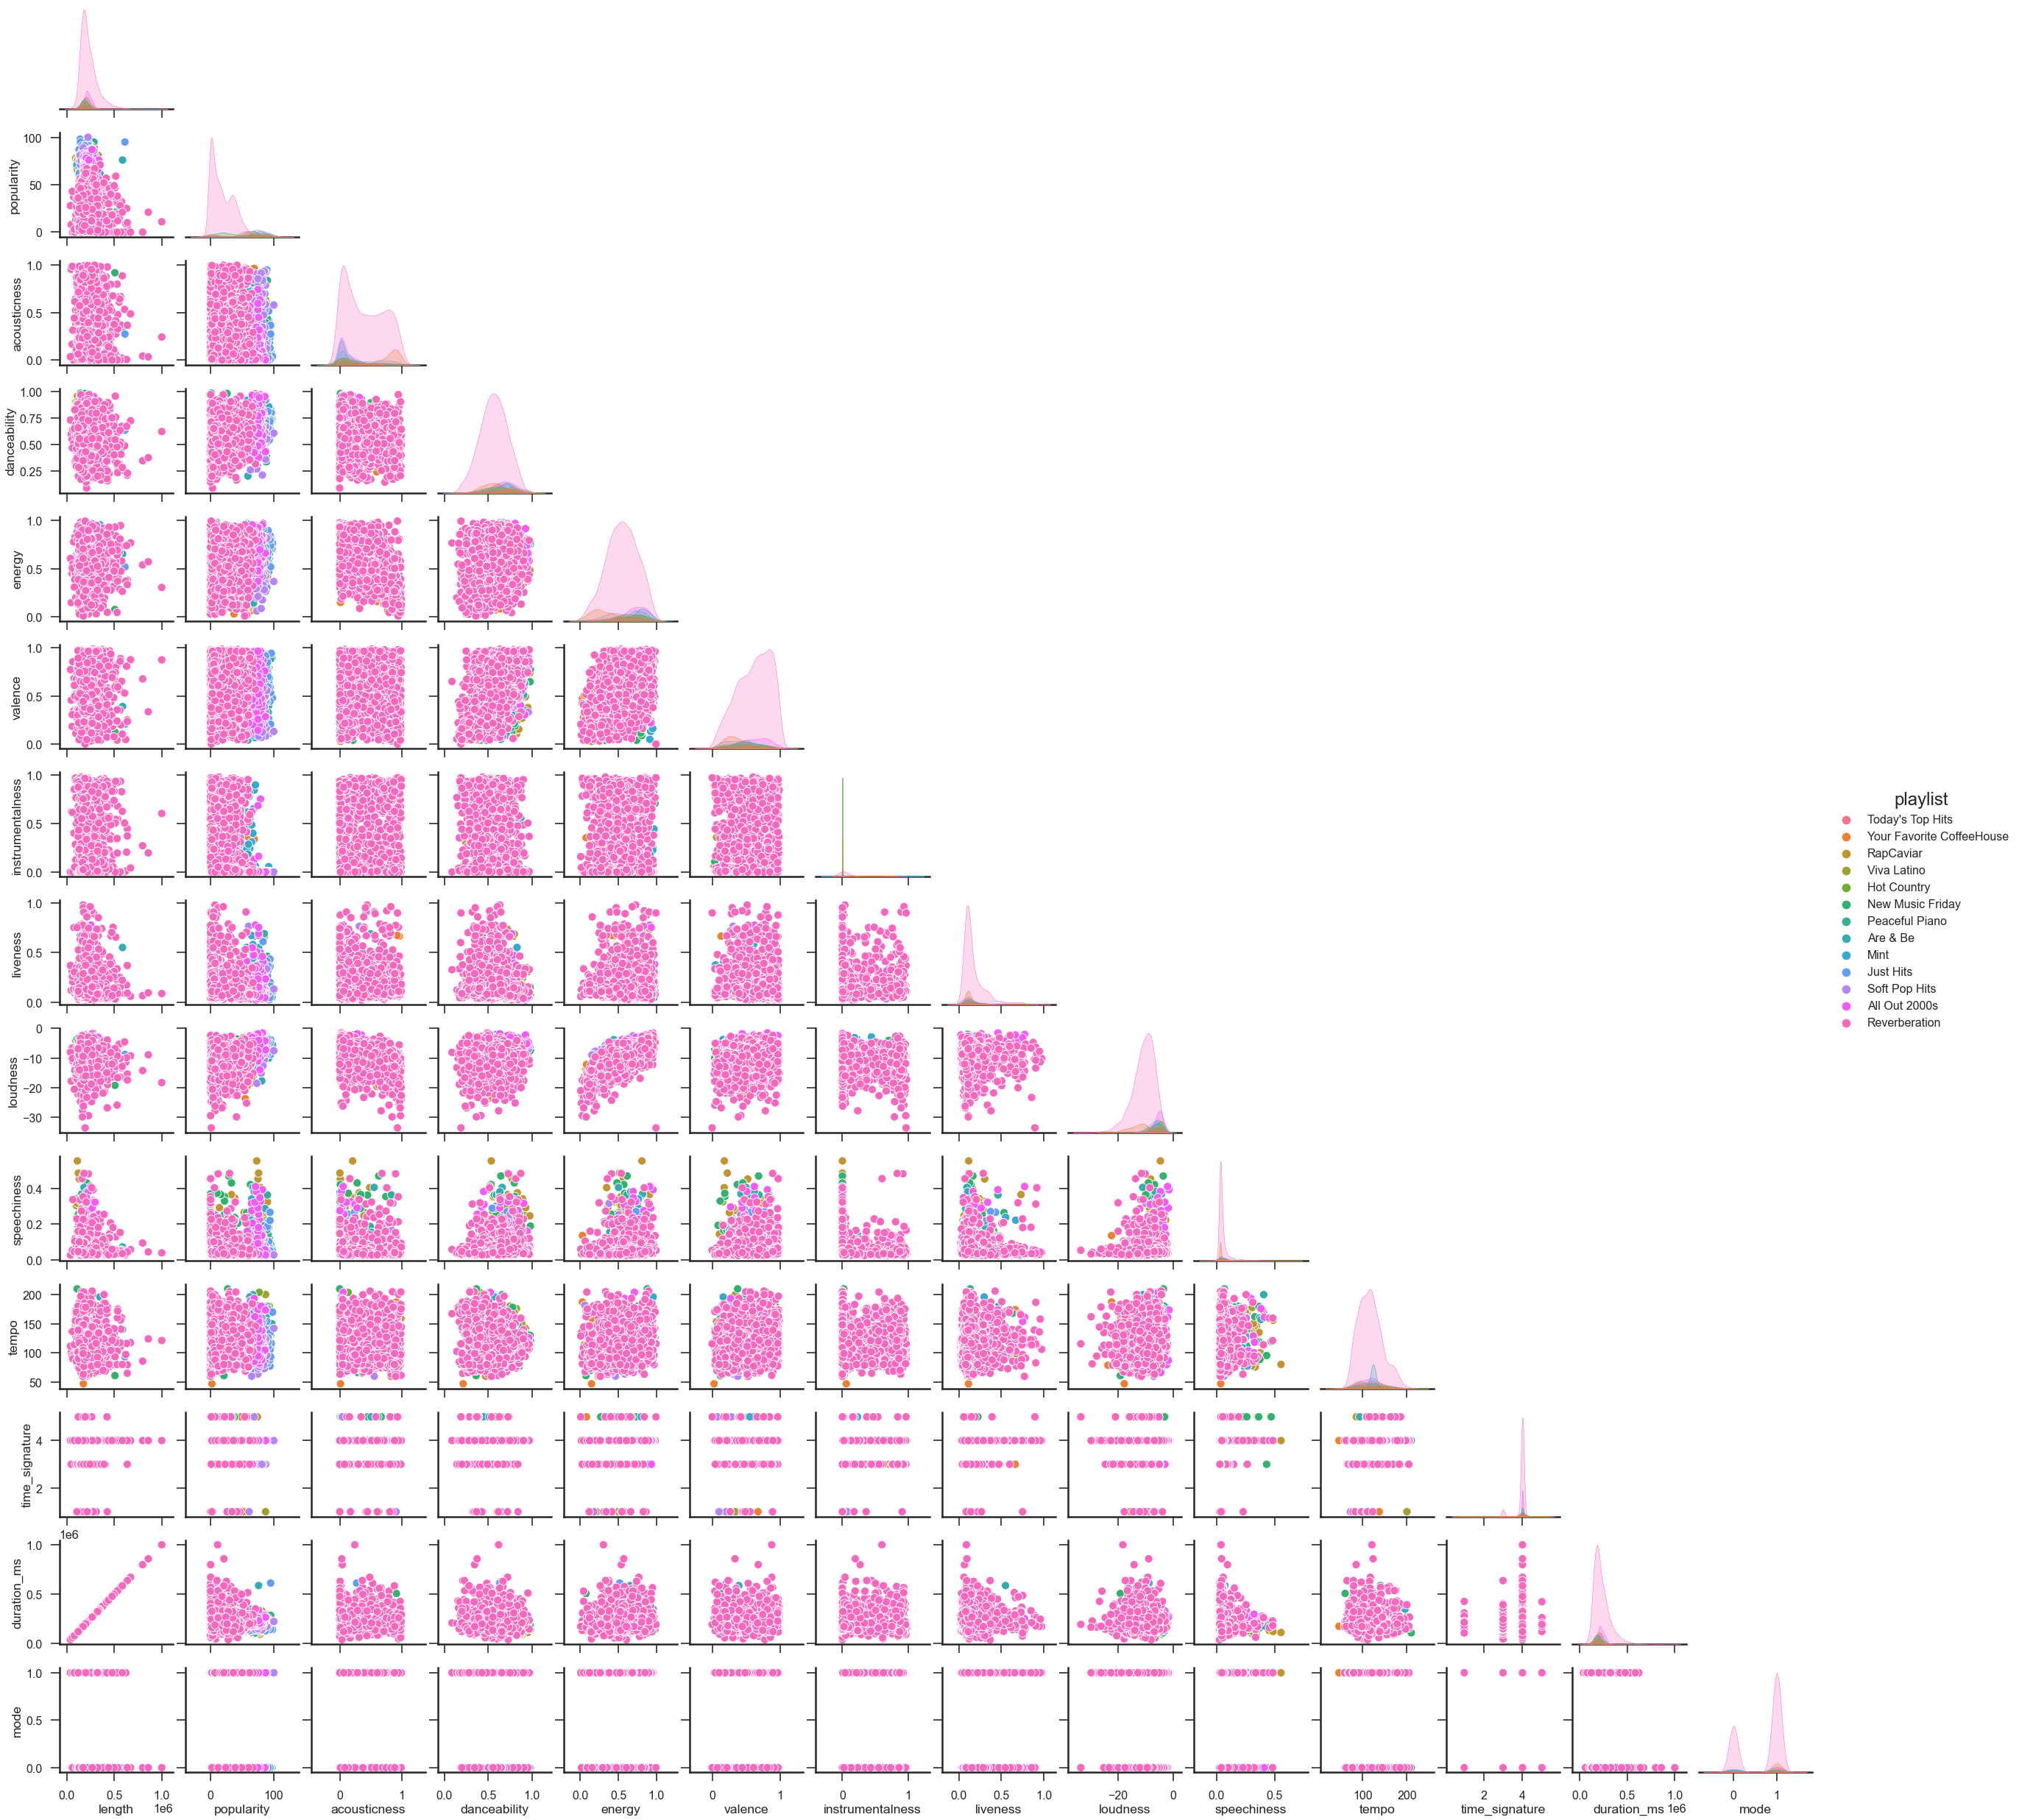

In [125]:
plt.figure(figsize=(24,8))
sns.pairplot(df[cols],corner=True,hue='playlist')
plt.show()